# Taking Measure of the Data - Time Series Data

Aus: Walker, Michael (2024): Python data cleaning cookbook. Prepare your data for analysis with pandas, NumPy, Matplotlib, scikit-learn and OpenAI. Second edition. Taking Measure of Your Data. Birmingham, UK: Packt Publishing Ltd (Expert insight). Online verfügbar unter https://learning.oreilly.com/library/view/-/9781803239873/?ar.


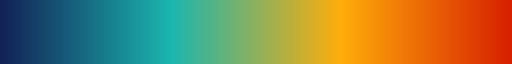

In [66]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from pypalettes import load_cmap
# Festlegen der Farben
cmap = load_cmap("Apricot")
cmap_continuous = load_cmap('Apricot', keep=[True, False, True, True, False, True], reverse= True, cmap_type='continuous')
cmap_continuous


In [27]:
# Import Data 
df_daily = pd.read_csv('df_daily.csv', usecols= ['date', 'calls', 'days_to_holiday'])
df_hourly = pd.read_csv('df_hourly_2020.csv', usecols= ['date', 'calls', 'days_to_holiday'])
# Size of Dataset
print(f"Size of df_daily: {df_daily.shape[0]} rows and {df_daily.shape[1]} columns")
print(f"Size of df_hourly: {df_hourly.shape[0]} rows and {df_hourly.shape[1]} columns")


Size of df_daily: 3652 rows and 3 columns
Size of df_hourly: 30696 rows and 3 columns


In [28]:
df_daily.head()

,date,calls,days_to_holiday
0,2014-01-01,153.0,0
1,2014-01-02,233.0,-1
2,2014-01-03,203.0,-2
3,2014-01-04,192.0,-3
4,2014-01-05,149.0,-4


In [29]:
df_hourly.head()

,date,calls,days_to_holiday
0,2020-07-01 00:00:00,1,-61
1,2020-07-01 01:00:00,5,-61
2,2020-07-01 02:00:00,4,-61
3,2020-07-01 03:00:00,2,-61
4,2020-07-01 04:00:00,1,-61


In [30]:
print(df_daily.info())
print(df_hourly.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3652 non-null   object 
 1   calls            3607 non-null   float64
 2   days_to_holiday  3652 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 85.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             30696 non-null  object
 1   calls            30696 non-null  int64 
 2   days_to_holiday  30696 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 719.6+ KB
None


In [31]:
df_daily['date'], df_hourly['date'] = pd.to_datetime(df_daily['date']), pd.to_datetime(df_hourly['date'])
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30696 non-null  datetime64[ns]
 1   calls            30696 non-null  int64         
 2   days_to_holiday  30696 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 719.6 KB


## Outlier Identification Using Statistical Methods
aus: Atwan (2922): *Time Series Analysis with Python Cookbook*. Chapter 8: Outlier Detection Using Statistical Methods.

In [ ]:
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

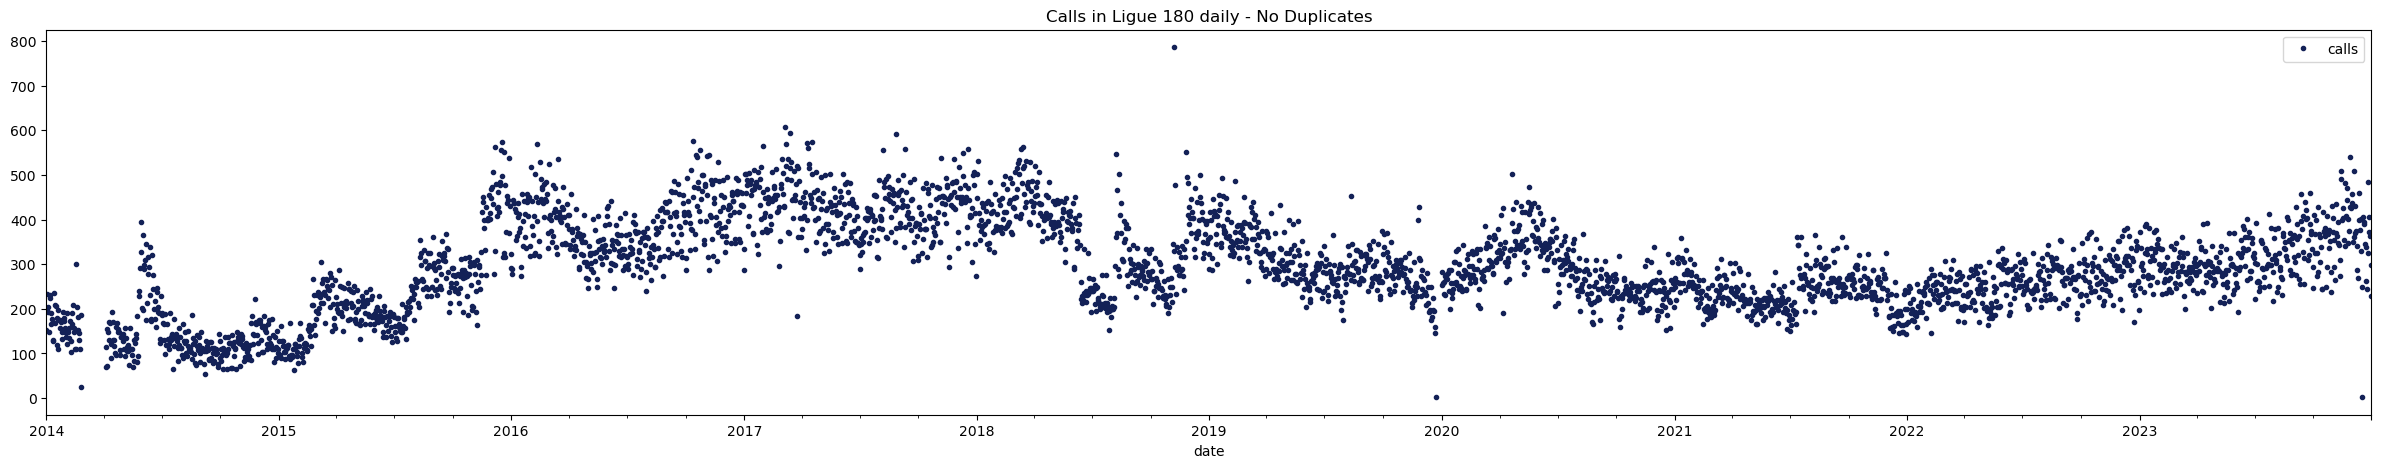

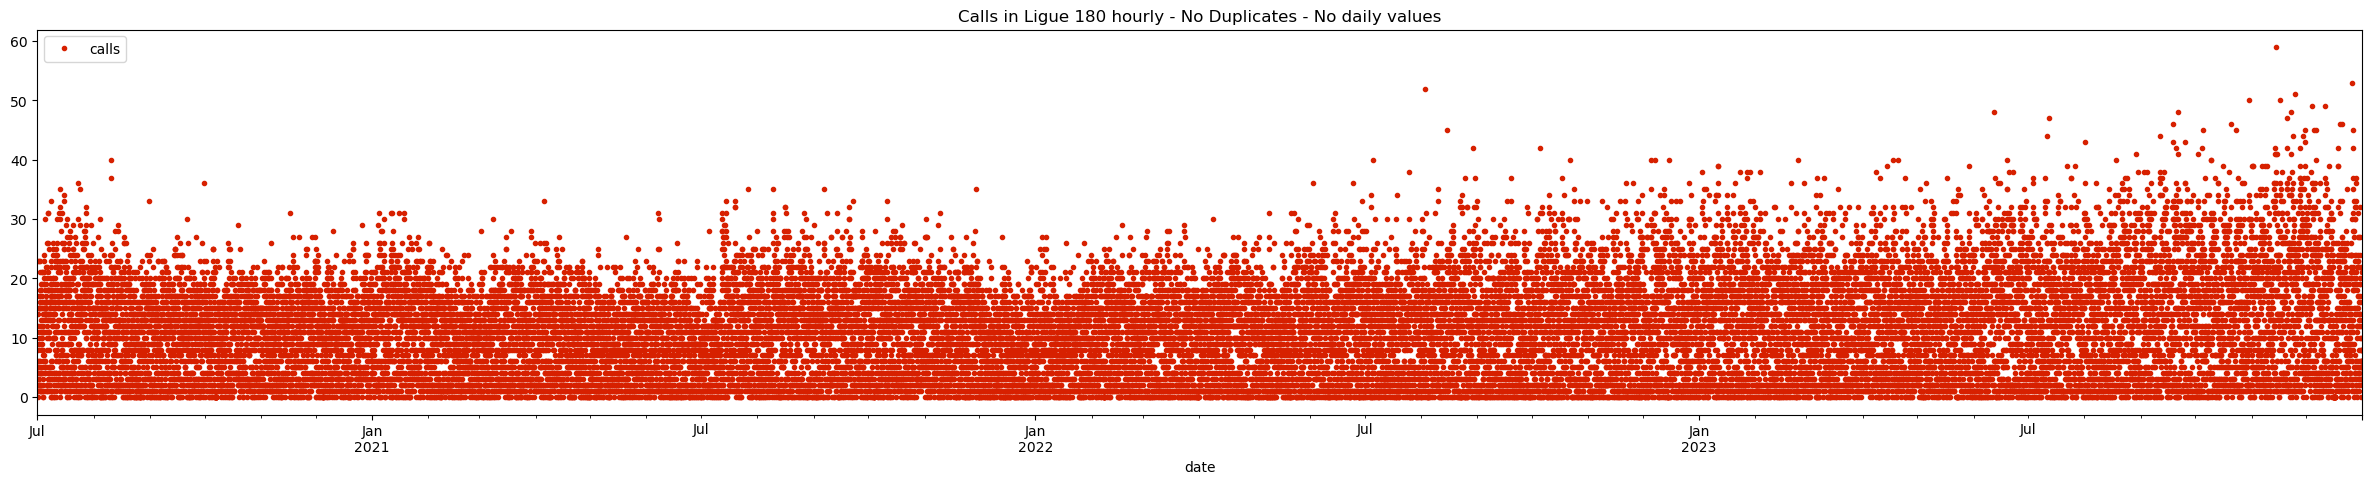

In [40]:
df_daily.plot(x = 'date', y = 'calls' , style='.', color = cmap.colors[5], figsize=(30,5), title='Calls in Ligue 180 daily - No Duplicates')
plt.show()
df_hourly.plot(x = 'date', y = 'calls' , style='.', color = cmap.colors[0], figsize=(30,5), title='Calls in Ligue 180 hourly - No Duplicates - No daily values')
plt.show()

In [ ]:
def plot_outliers(outliers, data, method='KNN',
                 halignment = 'right', 
                 valignment = 'bottom',
                 labels=False):
    ax = data.plot(alpha=0.6)
    
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'rx')
            plt.text(i[0], i[1], f'{i[0].date()}', 
                         horizontalalignment=halignment,
                         verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')
        
    plt.title(f'Hourly Calls in Ligue 180  - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

In [ ]:
data.plot_outliers()

AttributeError: 'DataFrame' object has no attribute 'plot_outliers'

## Transformation of the Data
Adding Hour, Weekday, Week of the Year, Month and Year as extra Columns

In [43]:
df_hourly['hour'] = df_hourly['date'].dt.hour                  # Stunde
df_hourly['weekday'] = df_hourly['date'].dt.weekday            # Wochentag (0=Montag, 6=Sonntag)
df_hourly['weekofyear'] = df_hourly['date'].dt.isocalendar().week  # Woche des Jahres
df_hourly['day'] = df_hourly['date'].dt.day                    # Tag des Monats
df_hourly['month'] = df_hourly['date'].dt.month                # Monat
df_hourly['year'] = df_hourly['date'].dt.year                  # Jahr

df_daily['weekday'] = df_daily['date'].dt.weekday            # Wochentag (0=Montag, 6=Sonntag)
df_daily['weekofyear'] = df_daily['date'].dt.isocalendar().week  # Woche des Jahres
df_daily['day'] = df_daily['date'].dt.day                    # Tag des Monats
df_daily['month'] = df_daily['date'].dt.month                # Monat
df_daily['year'] = df_daily['date'].dt.year                  # Jahr

In [45]:
df_hourly.head(24)

,date,calls,days_to_holiday,hour,weekday,weekofyear,day,month,year
0,2020-07-01 00:00:00,1,-61,0,2,27,1,7,2020
1,2020-07-01 01:00:00,5,-61,1,2,27,1,7,2020
2,2020-07-01 02:00:00,4,-61,2,2,27,1,7,2020
3,2020-07-01 03:00:00,2,-61,3,2,27,1,7,2020
4,2020-07-01 04:00:00,1,-61,4,2,27,1,7,2020
5,2020-07-01 05:00:00,0,-61,5,2,27,1,7,2020
6,2020-07-01 06:00:00,2,-61,6,2,27,1,7,2020
7,2020-07-01 07:00:00,4,-61,7,2,27,1,7,2020
8,2020-07-01 08:00:00,5,-61,8,2,27,1,7,2020
9,2020-07-01 09:00:00,8,-61,9,2,27,1,7,2020


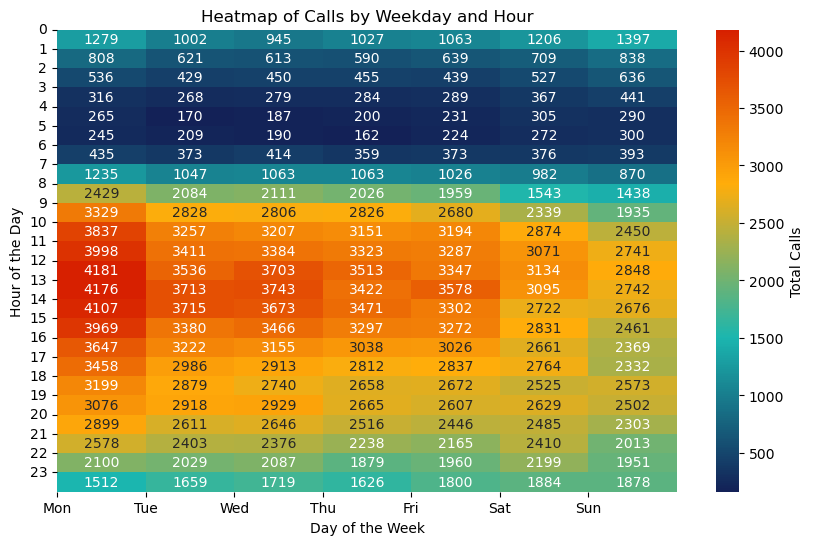

In [67]:
calls_per_hour_weekday = df_hourly.groupby(['hour', 'weekday'])['calls'].sum().unstack()
plt.figure(figsize=(10, 6))  # Optional: Größe der Heatmap
sns.heatmap(calls_per_hour_weekday, cmap=cmap_continuous, annot=True, fmt="g", cbar_kws={'label': 'Total Calls'})

# Achsenbeschriftungen und Titel
plt.title('Heatmap of Calls by Weekday and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

# Anpassung der x-Achse mit Wochentagnamen
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

# Anpassung der y-Achse mit den Stunden (0-23)
plt.yticks(ticks=range(24), labels=range(24), rotation=0)

plt.show()

In [68]:

def categorical_heatmap (data, x, y, z):
    #calls_per_hour_weekday = data.groupby([y, x])[z].sum().unstack()
    calls_per_hour_weekday = data.groupby([x, y])[z].mean().unstack().T
    plt.figure(figsize=(10, 6))  # Optional: Größe der Heatmap
    sns.heatmap(calls_per_hour_weekday, cmap=cmap_continuous, annot=True, fmt="g", cbar_kws={'label': 'Total ' + z})

    # Achsenbeschriftungen und Titel
    plt.title('Heatmap of ' + z + ' by ' + x + ' and ' + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Anpassung der x-Achse mit Wochentagnamen
    #plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

    # Anpassung der y-Achse mit den Stunden (0-23)
    plt.yticks(rotation=0)

    plt.show()

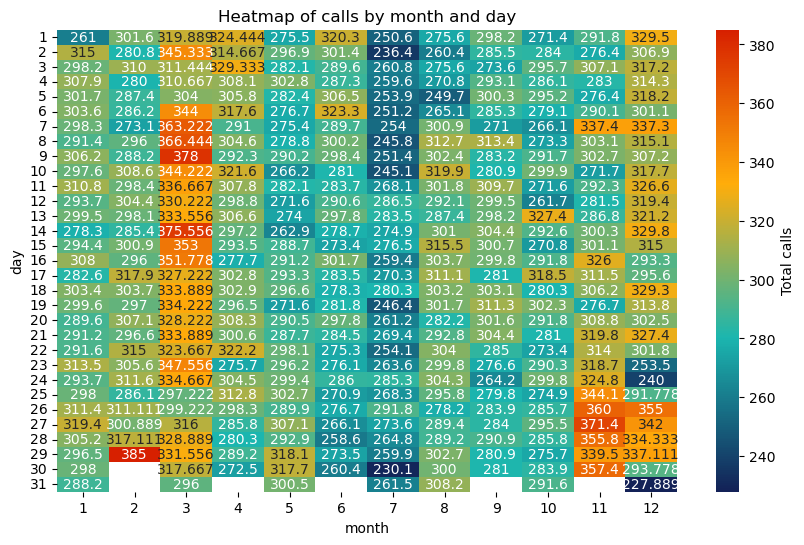

In [69]:
categorical_heatmap(df_daily, 'month', 'day', 'calls') #TODO durch die Menge an Jahren teilen -> ins Verhältnis setzen

In [75]:
def categorical_heatmap_mean(data, x, y, z):
    calls_per_hour_weekday = data.groupby([x, y])[z].mean().unstack().T

    # Plotten der Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(calls_per_hour_weekday, cmap=cmap_continuous, annot=True, fmt=".2f", cbar_kws={'label': 'Average Calls'})
    
    # Achsenbeschriftungen und Titel
    plt.title('Average Calls by Weekday and Week of the Year')
    plt.xlabel('Day of the Week')
    plt.ylabel('Week of the Year')
    
    # Anpassung der y-Achse für Wochentage
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
    
    plt.show()


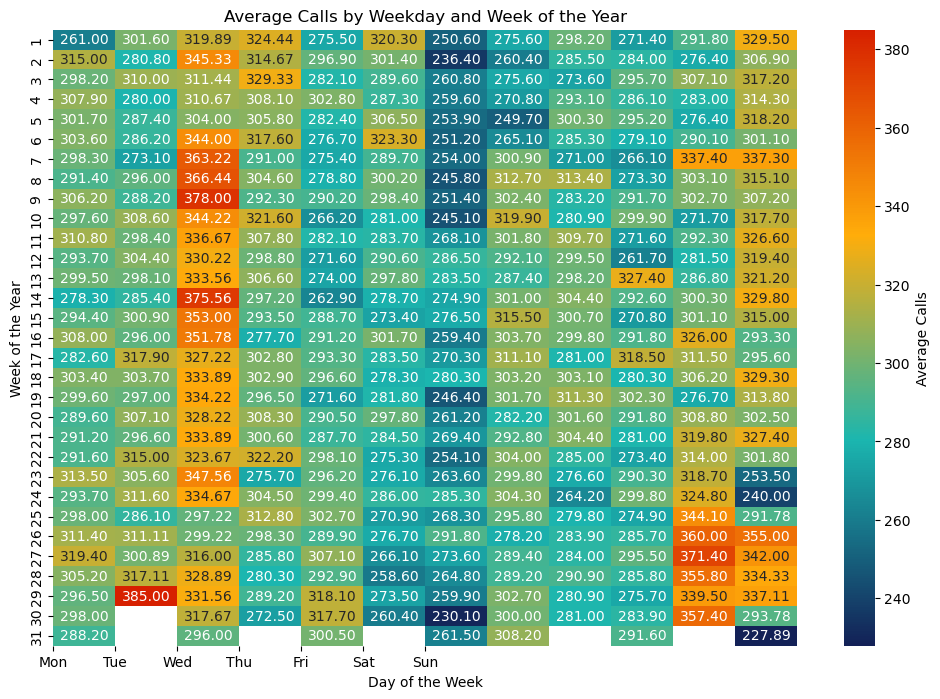

In [76]:
categorical_heatmap_mean(df_daily, 'month', 'day', 'calls')

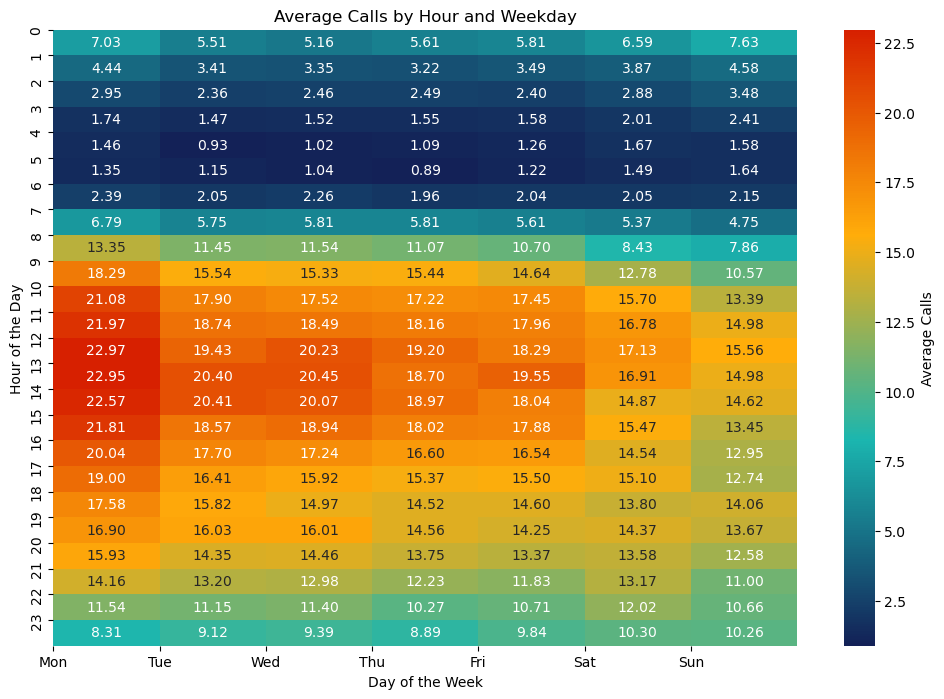

In [79]:
def plot_hourly_average_heatmap(data, x, y, z):
    
    avg_calls_per_hour_weekday = data.groupby([x, y])[z].mean().unstack().T
    
    # Plotten der Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(avg_calls_per_hour_weekday, cmap=cmap_continuous, annot=True, fmt=".2f", cbar_kws={'label': 'Average Calls'})
    
    # Achsenbeschriftungen und Titel
    plt.title('Average Calls by Hour and Weekday')
    plt.ylabel('Hour of the Day')
    plt.xlabel('Day of the Week')
    
    # Anpassung der y-Achse für Wochentage und x-Achse für Stunden
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
    plt.yticks(ticks=range(24), labels=range(24))
    
    plt.show()

# Beispielaufruf:
plot_hourly_average_heatmap(df_hourly, 'weekday', 'hour', 'calls')

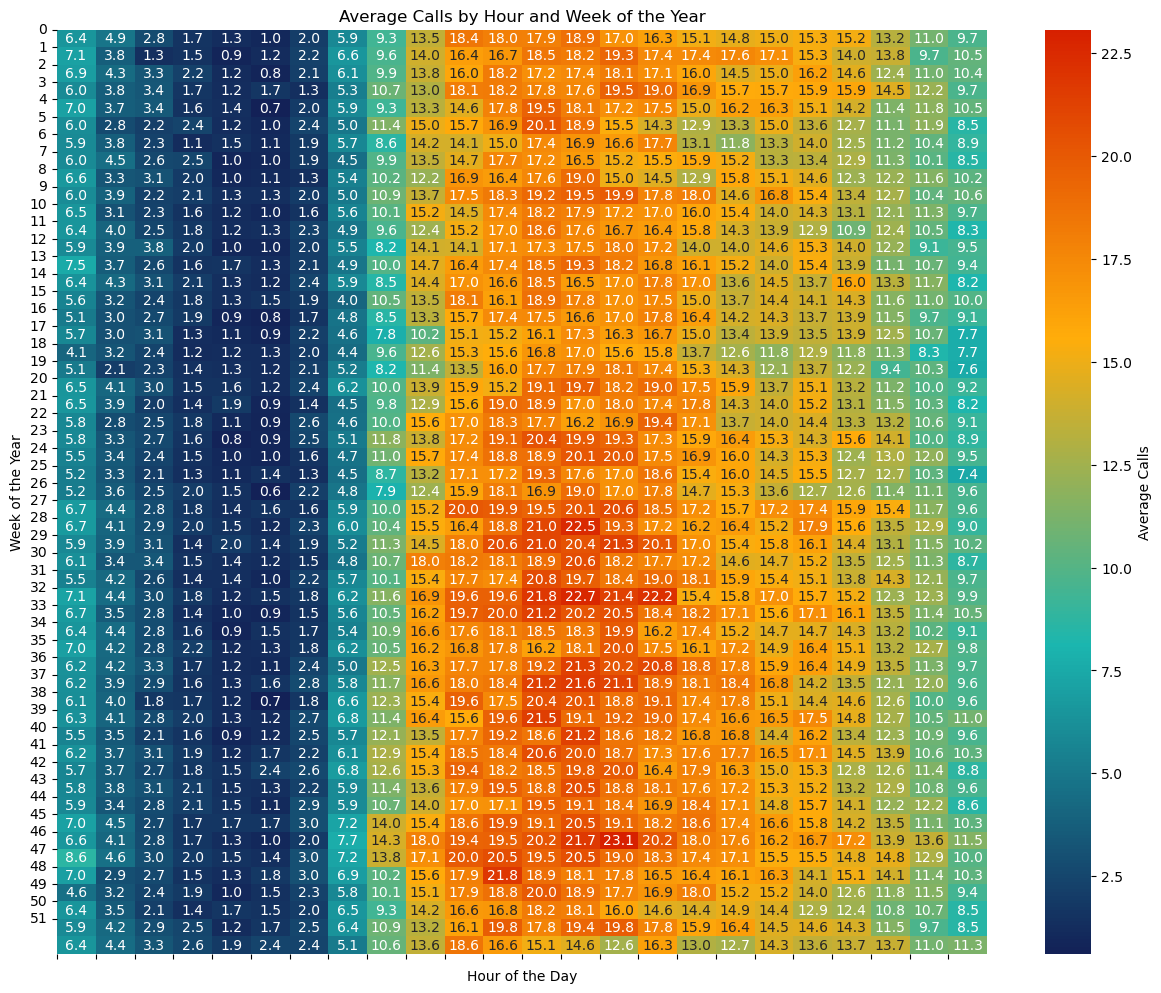

In [81]:
def plot_hourly_average_heatmap(data, x, y, z):
    
    avg_calls_per_hour_yearweek = data.groupby([x, y])[z].mean().unstack().T
    
    # Plotten der Heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(avg_calls_per_hour_yearweek, cmap=cmap_continuous, annot=True, fmt=".1f", cbar_kws={'label': 'Average Calls'})
    
    # Achsenbeschriftungen und Titel
    plt.title('Average Calls by Hour and Week of the Year')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Week of the Year')
    
    # Anpassung der y-Achse für Wochentage und x-Achse für Stunden
    plt.xticks(ticks=range(24), rotation=0)
    plt.yticks(ticks=range(52), labels=range(52))
    
    plt.show()

# Beispielaufruf:
plot_hourly_average_heatmap(df_hourly, 'hour', 'weekofyear', 'calls')

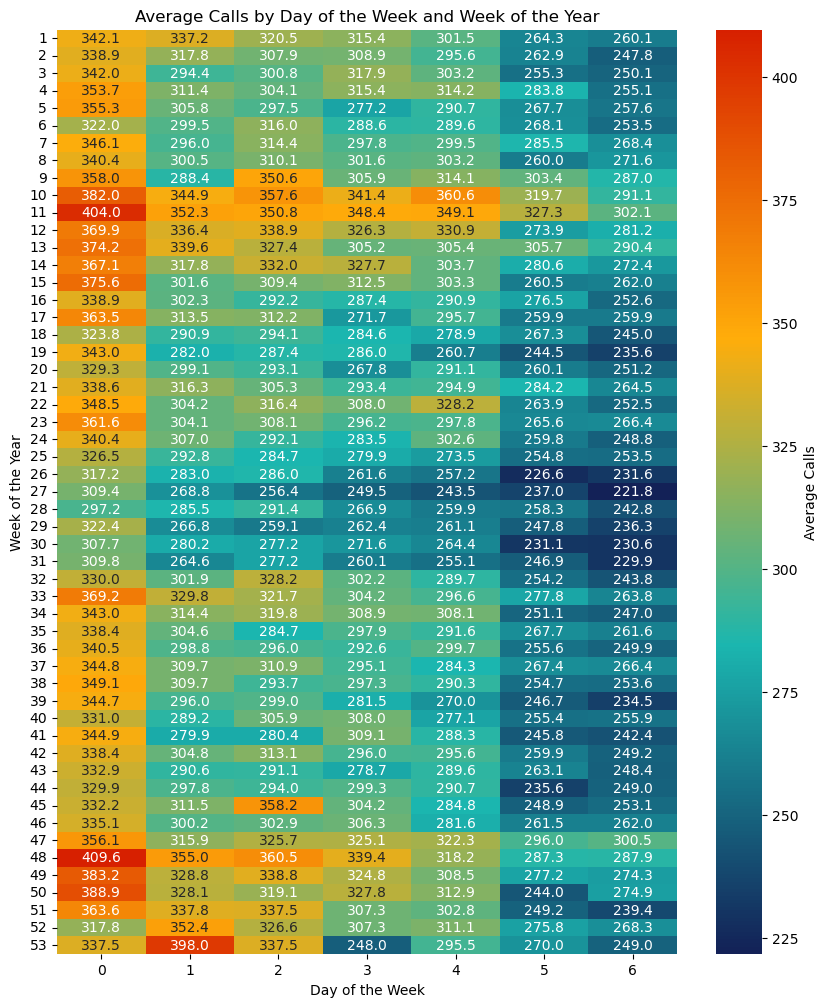

In [82]:
def plot_hourly_average_heatmap(data, x, y, z):
    
    avg_calls_per_hour_yearweek = data.groupby([x, y])[z].mean().unstack().T
    
    # Plotten der Heatmap
    plt.figure(figsize=(10, 12))
    sns.heatmap(avg_calls_per_hour_yearweek, cmap=cmap_continuous, annot=True, fmt=".1f", cbar_kws={'label': 'Average Calls'})
    
    # Achsenbeschriftungen und Titel
    plt.title('Average Calls by Day of the Week and Week of the Year')
    plt.xlabel('Day of the Week')
    plt.ylabel('Week of the Year')
    
    # Anpassung der y-Achse für Wochentage und x-Achse für Stunden
    #plt.xticks(ticks=range(24), rotation=0)
    #plt.yticks(ticks=range(52), labels=range(52))
    
    plt.show()

# Beispielaufruf:
plot_hourly_average_heatmap(df_daily, 'weekday', 'weekofyear', 'calls')